In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import pandas as pd

from sklearn import preprocessing

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
df_tr = pd.read_csv('Data\Intrusion-Detection\Train_data.csv',na_values='?',header=0)
df_tr.head(6)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,icmp,20,2,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,45,2,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,icmp,50,4,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos
3,0,icmp,25,2,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,icmp,25,2,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
5,0,icmp,50,1,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,dos


In [7]:
df_ts = pd.read_csv('Data\Intrusion-Detection\Test_data.csv',na_values='?',header=0)
df_ts.head(6)

,Unnamed: 0,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,202,0,icmp,25,4,0,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.65,0.65,0.32,0.32,dos
1,768,0,icmp,25,2,312,1856,0,0,0,...,254,1.00,0.00,1.00,0.06,0.00,0.00,0.00,0.00,normal
2,3753,0,icmp,25,2,245,2058,0,0,0,...,255,1.00,0.00,0.01,0.05,0.01,0.00,0.00,0.00,normal
3,20087,0,icmp,25,2,298,1267,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
4,16159,0,icmp,20,2,740,0,0,0,0,...,19,0.18,0.03,0.18,0.00,0.00,0.00,0.00,0.00,normal
5,18012,0,icmp,25,2,304,16414,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [77]:
Xtr = np.array(df_tr.drop('xAttack',axis=1))
ytr = np.array(df_tr['xAttack'])
Xts = np.array(df_ts.drop('xAttack',axis=1))
yts = np.array(df_ts['xAttack'])

In [73]:
le = preprocessing.LabelEncoder()
lb = preprocessing.LabelBinarizer()

In [78]:
Xtr[:,1] = le.fit_transform(Xtr[:,1])
Xts[:,2] = le.fit_transform(Xts[:,2])
Xts = np.delete(Xts,0,axis=1)


ytr = le.fit_transform(ytr)
lb.fit_transform(ytr)

yts = le.fit_transform(yts)
lb.fit_transform(yts)


array([[1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       ...,
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0]])

In [79]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()
scaler.fit(Xtr)
Xtr_t = scaler.transform(Xtr)

In [87]:
from sklearn.decomposition import PCA
ncomp =40
# Construct the PCA object
pca = PCA(n_components=ncomp, 
          svd_solver='randomized', whiten=True)

# Fit the PCA components on the entire dataset
pca.fit(Xtr_t)
Ztr = pca.transform(Xtr_t)

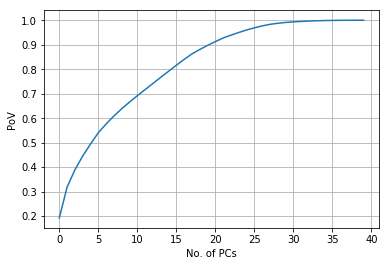

In [88]:
S = pca.singular_values_

lam = S**2
PoV = np.cumsum(lam)/np.sum(lam)

plt.plot(PoV)
plt.xlabel('No. of PCs')
plt.ylabel('PoV')
plt.grid()

In [89]:
logreg = LogisticRegression(multi_class='auto', solver='lbfgs')
logreg.fit(Ztr,ytr)

# TODO:  Transform the test data through data scaler and PCA
Xts_t = scaler.transform(Xts)
Zts = pca.transform(Xts_t)

# TODO:  Predict the labels the test data
yhat = logreg.predict(Zts)

In [90]:
acc = np.mean(yhat == yts)
print('Accuracy', acc)

Accuracy 0.7526
